# Load Data

In [50]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

plt.rcParams['figure.figsize']=(12,4)
sns.set_context("talk",font_scale=.9)

## Opening zip file in juputer notebook

In [5]:
import glob
folder = "Data/Data/"
crime_files = sorted(glob.glob(folder+"*.csv"))
df=pd.concat([pd.read_csv(f) for f in crime_files])

In [6]:
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7713109 entries, 0 to 238857
Data columns (total 12 columns):
 #   Column                Dtype  
---  ------                -----  
 0   ID                    int64  
 1   Date                  object 
 2   Primary Type          object 
 3   Description           object 
 4   Location Description  object 
 5   Arrest                bool   
 6   Domestic              bool   
 7   Beat                  int64  
 8   District              float64
 9   Ward                  float64
 10  Latitude              float64
 11  Longitude             float64
dtypes: bool(2), float64(4), int64(2), object(4)
memory usage: 662.0+ MB


,ID,Date,Primary Type,Description,Location Description,Arrest,Domestic,Beat,District,Ward,Latitude,Longitude
0,1326041,01/01/2001 01:00:00 AM,BATTERY,SIMPLE,RESIDENCE,False,False,1624,16.0,NaN,41.957850,-87.749185
1,1319931,01/01/2001 01:00:00 PM,BATTERY,SIMPLE,RESIDENCE,False,True,825,8.0,NaN,41.783892,-87.684841
2,1324743,01/01/2001 01:00:00 PM,GAMBLING,ILLEGAL ILL LOTTERY,STREET,True,False,313,3.0,NaN,41.780412,-87.611970
3,1310717,01/01/2001 01:00:00 AM,CRIMINAL DAMAGE,TO VEHICLE,STREET,False,False,2424,24.0,NaN,42.012391,-87.678032
4,1318099,01/01/2001 01:00:00 AM,BATTERY,SIMPLE,RESIDENCE PORCH/HALLWAY,False,True,214,2.0,NaN,41.819538,-87.620020


In [7]:
df['Date']=pd.to_datetime(df['Date'],format='%m/%d/%Y %I:%M:%S %p')
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7713109 entries, 0 to 238857
Data columns (total 12 columns):
 #   Column                Dtype         
---  ------                -----         
 0   ID                    int64         
 1   Date                  datetime64[ns]
 2   Primary Type          object        
 3   Description           object        
 4   Location Description  object        
 5   Arrest                bool          
 6   Domestic              bool          
 7   Beat                  int64         
 8   District              float64       
 9   Ward                  float64       
 10  Latitude              float64       
 11  Longitude             float64       
dtypes: bool(2), datetime64[ns](1), float64(4), int64(2), object(3)
memory usage: 662.0+ MB


,ID,Date,Primary Type,Description,Location Description,Arrest,Domestic,Beat,District,Ward,Latitude,Longitude
0,1326041,2001-01-01 01:00:00,BATTERY,SIMPLE,RESIDENCE,False,False,1624,16.0,NaN,41.957850,-87.749185
1,1319931,2001-01-01 13:00:00,BATTERY,SIMPLE,RESIDENCE,False,True,825,8.0,NaN,41.783892,-87.684841
2,1324743,2001-01-01 13:00:00,GAMBLING,ILLEGAL ILL LOTTERY,STREET,True,False,313,3.0,NaN,41.780412,-87.611970
3,1310717,2001-01-01 01:00:00,CRIMINAL DAMAGE,TO VEHICLE,STREET,False,False,2424,24.0,NaN,42.012391,-87.678032
4,1318099,2001-01-01 01:00:00,BATTERY,SIMPLE,RESIDENCE PORCH/HALLWAY,False,True,214,2.0,NaN,41.819538,-87.620020


In [9]:
df=df.sort_values('Date')
df

,ID,Date,Primary Type,Description,Location Description,Arrest,Domestic,Beat,District,Ward,Latitude,Longitude
1541,3214584,2001-01-01 00:00:00,THEFT,FINANCIAL ID THEFT: OVER $300,STREET,False,False,2221,22.0,21.0,41.732563,-87.669923
1335,2393821,2001-01-01 00:00:00,DECEPTIVE PRACTICE,FINAN EXPLOIT-ELDERLY/DISABLED,RESIDENCE,False,False,914,9.0,12.0,41.815118,-87.686955
1365,2621045,2001-01-01 00:00:00,OFFENSE INVOLVING CHILDREN,CHILD ABUSE,RESIDENCE,False,True,2515,25.0,30.0,41.924526,-87.773161
1366,9755238,2001-01-01 00:00:00,SEX OFFENSE,AGG CRIMINAL SEXUAL ABUSE,CHURCH/SYNAGOGUE/PLACE OF WORSHIP,False,False,1022,10.0,24.0,NaN,NaN
1360,3849799,2001-01-01 00:00:00,THEFT,FINANCIAL ID THEFT: OVER $300,OTHER,False,False,233,2.0,20.0,41.790507,-87.620595
...,...,...,...,...,...,...,...,...,...,...,...,...
238753,12938351,2022-12-31 23:47:00,ASSAULT,SIMPLE,STREET,True,False,2221,22.0,21.0,41.727812,-87.660399
238754,12938340,2022-12-31 23:47:00,WEAPONS VIOLATION,UNLAWFUL POSSESSION - HANDGUN,APARTMENT,True,False,2221,22.0,21.0,41.727812,-87.660399
238756,12938337,2022-12-31 23:50:00,MOTOR VEHICLE THEFT,AUTOMOBILE,ALLEY,False,False,2431,24.0,49.0,42.009108,-87.666844
238755,12938426,2022-12-31 23:50:00,BATTERY,DOMESTIC BATTERY SIMPLE,APARTMENT,False,True,1523,15.0,29.0,41.882257,-87.763744


In [10]:
df=df.set_index('Date').copy()
df.head()

,ID,Primary Type,Description,Location Description,Arrest,Domestic,Beat,District,Ward,Latitude,Longitude
Date,,,,,,,,,,,
2001-01-01,3214584,THEFT,FINANCIAL ID THEFT: OVER $300,STREET,False,False,2221,22.0,21.0,41.732563,-87.669923
2001-01-01,2393821,DECEPTIVE PRACTICE,FINAN EXPLOIT-ELDERLY/DISABLED,RESIDENCE,False,False,914,9.0,12.0,41.815118,-87.686955
2001-01-01,2621045,OFFENSE INVOLVING CHILDREN,CHILD ABUSE,RESIDENCE,False,True,2515,25.0,30.0,41.924526,-87.773161
2001-01-01,9755238,SEX OFFENSE,AGG CRIMINAL SEXUAL ABUSE,CHURCH/SYNAGOGUE/PLACE OF WORSHIP,False,False,1022,10.0,24.0,NaN,NaN
2001-01-01,3849799,THEFT,FINANCIAL ID THEFT: OVER $300,OTHER,False,False,233,2.0,20.0,41.790507,-87.620595


In [21]:
theft=df[df['Primary Type']=='THEFT']
theft

,ID,Primary Type,Description,Location Description,Arrest,Domestic,Beat,District,Ward,Latitude,Longitude
Date,,,,,,,,,,,
2001-01-01 00:00:00,3214584,THEFT,FINANCIAL ID THEFT: OVER $300,STREET,False,False,2221,22.0,21.0,41.732563,-87.669923
2001-01-01 00:00:00,3849799,THEFT,FINANCIAL ID THEFT: OVER $300,OTHER,False,False,233,2.0,20.0,41.790507,-87.620595
2001-01-01 00:00:00,6739668,THEFT,FINANCIAL ID THEFT: OVER $300,RESIDENCE,False,False,1833,18.0,42.0,41.896660,-87.624110
2001-01-01 00:00:00,3182190,THEFT,FINANCIAL ID THEFT: OVER $300,APARTMENT,False,False,2213,22.0,21.0,41.711499,-87.655083
2001-01-01 00:00:00,2353946,THEFT,FINANCIAL ID THEFT:$300 &UNDER,RESIDENCE,False,False,912,9.0,12.0,41.812451,-87.694479
...,...,...,...,...,...,...,...,...,...,...,...
2022-12-31 23:00:00,13026856,THEFT,OVER $500,STREET,False,False,1224,12.0,27.0,NaN,NaN
2022-12-31 23:00:00,12942610,THEFT,OVER $500,APARTMENT,False,False,1512,15.0,29.0,NaN,NaN
2022-12-31 23:30:00,12950713,THEFT,POCKET-PICKING,BAR OR TAVERN,False,False,1822,18.0,27.0,NaN,NaN


In [19]:
df['Primary Type'].value_counts()

THEFT                                1626992
BATTERY                              1410889
CRIMINAL DAMAGE                       878914
NARCOTICS                             746155
ASSAULT                               501103
OTHER OFFENSE                         479174
BURGLARY                              422246
MOTOR VEHICLE THEFT                   366586
DECEPTIVE PRACTICE                    340958
ROBBERY                               289677
CRIMINAL TRESPASS                     212869
WEAPONS VIOLATION                     103906
PROSTITUTION                           69750
OFFENSE INVOLVING CHILDREN             55280
PUBLIC PEACE VIOLATION                 52086
SEX OFFENSE                            30442
CRIM SEXUAL ASSAULT                    27584
INTERFERENCE WITH PUBLIC OFFICER       18206
LIQUOR LAW VIOLATION                   14846
GAMBLING                               14616
ARSON                                  13121
HOMICIDE                               12394
KIDNAPPING

In [24]:
narcotics=df[df["Primary Type"]=='NARCOTICS']
narcotics

,ID,Primary Type,Description,Location Description,Arrest,Domestic,Beat,District,Ward,Latitude,Longitude
Date,,,,,,,,,,,
2001-01-01 00:25:00,1327588,NARCOTICS,POSS: CANNABIS 30GMS OR LESS,CTA TRAIN,True,False,132,1.0,NaN,41.868041,-87.627290
2001-01-01 00:45:00,1327256,NARCOTICS,POSS: CANNABIS 30GMS OR LESS,STREET,True,False,1332,12.0,NaN,41.882753,-87.676829
2001-01-01 00:45:00,1324718,NARCOTICS,POSS: CRACK,CHA APARTMENT,True,False,723,7.0,NaN,41.775229,-87.640605
2001-01-01 01:12:00,1325471,NARCOTICS,POSS: CANNABIS MORE THAN 30GMS,RESIDENCE,True,False,2411,24.0,NaN,42.012293,-87.694610
2001-01-01 02:29:00,1324655,NARCOTICS,POSS: CANNABIS 30GMS OR LESS,VEHICLE NON-COMMERCIAL,True,False,623,6.0,NaN,41.750884,-87.623141
...,...,...,...,...,...,...,...,...,...,...,...
2022-12-31 15:37:00,12937989,NARCOTICS,SOLICIT NARCOTICS ON PUBLIC WAY,SIDEWALK,True,False,1122,11.0,28.0,41.880749,-87.723929
2022-12-31 16:20:00,12938016,NARCOTICS,POSSESS - HEROIN (WHITE),SIDEWALK,True,False,1112,11.0,27.0,41.901522,-87.720176
2022-12-31 17:03:00,12938026,NARCOTICS,POSSESS - CANNABIS MORE THAN 30 GRAMS,STREET,True,False,1522,15.0,29.0,41.880951,-87.764879


In [22]:
theft.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1626992 entries, 2001-01-01 00:00:00 to 2022-12-31 23:35:00
Data columns (total 11 columns):
 #   Column                Non-Null Count    Dtype  
---  ------                --------------    -----  
 0   ID                    1626992 non-null  int64  
 1   Primary Type          1626992 non-null  object 
 2   Description           1626992 non-null  object 
 3   Location Description  1626209 non-null  object 
 4   Arrest                1626992 non-null  bool   
 5   Domestic              1626992 non-null  bool   
 6   Beat                  1626992 non-null  int64  
 7   District              1626988 non-null  float64
 8   Ward                  1504194 non-null  float64
 9   Latitude              1605887 non-null  float64
 10  Longitude             1605887 non-null  float64
dtypes: bool(2), float64(4), int64(2), object(3)
memory usage: 127.2+ MB


In [25]:
narcotics.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 746155 entries, 2001-01-01 00:25:00 to 2022-12-31 21:45:00
Data columns (total 11 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   ID                    746155 non-null  int64  
 1   Primary Type          746155 non-null  object 
 2   Description           746155 non-null  object 
 3   Location Description  746154 non-null  object 
 4   Arrest                746155 non-null  bool   
 5   Domestic              746155 non-null  bool   
 6   Beat                  746155 non-null  int64  
 7   District              746154 non-null  float64
 8   Ward                  678832 non-null  float64
 9   Latitude              733594 non-null  float64
 10  Longitude             733594 non-null  float64
dtypes: bool(2), float64(4), int64(2), object(3)
memory usage: 58.4+ MB


In [26]:
rtheft=theft.resample('M').size()
rtheft

Date
2001-01-31    7867
2001-02-28    6669
2001-03-31    7766
2001-04-30    7702
2001-05-31    8420
              ... 
2022-08-31    5244
2022-09-30    5117
2022-10-31    5242
2022-11-30    4717
2022-12-31    4413
Freq: M, Length: 264, dtype: int64

In [27]:
rnarcotics=narcotics.resample('M').size()
rnarcotics

Date
2001-01-31    4714
2001-02-28    4369
2001-03-31    4862
2001-04-30    4044
2001-05-31    4038
              ... 
2022-08-31     420
2022-09-30     379
2022-10-31     358
2022-11-30     339
2022-12-31     325
Freq: M, Length: 264, dtype: int64

In [28]:
rtheft.isna().sum()

0

In [29]:
rnarcotics.isna().sum()

0

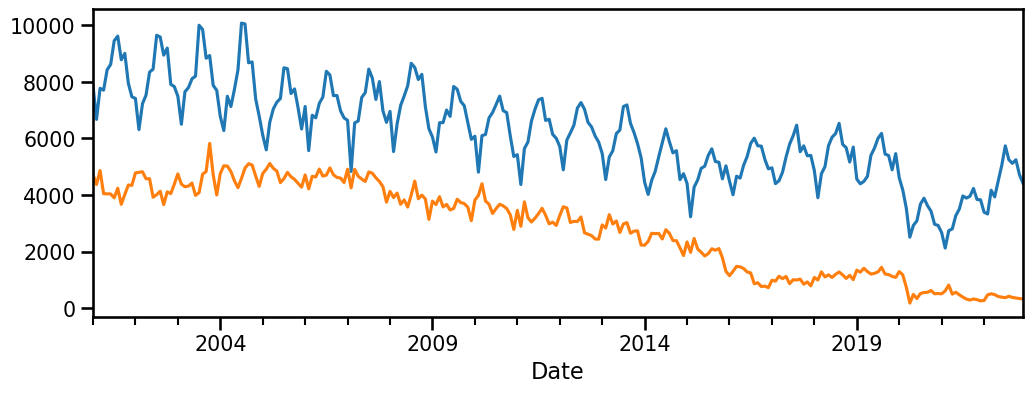

In [51]:
rtheft.plot()
rnarcotics.plot();

In [33]:
import statsmodels.tsa.api as tsa

In [36]:
dtheft=tsa.seasonal_decompose(rtheft)
dtheft

In [40]:
dnarcotics=tsa.seasonal_decompose(rnarcotics)
dnarcotics

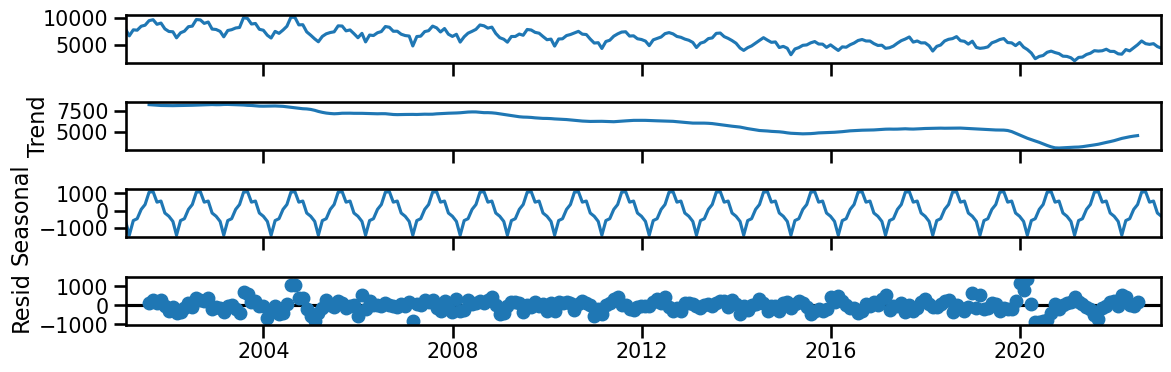

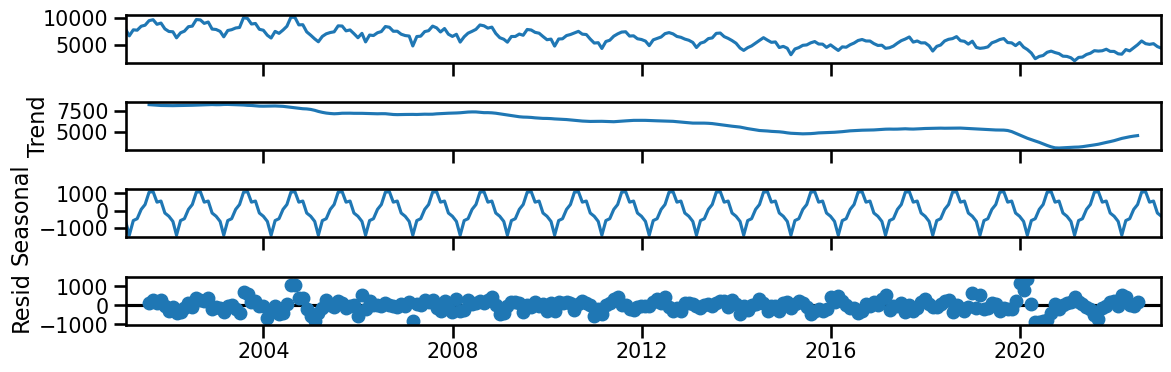

In [52]:
dtheft.plot()
dtheft.plot(seasonal=True);

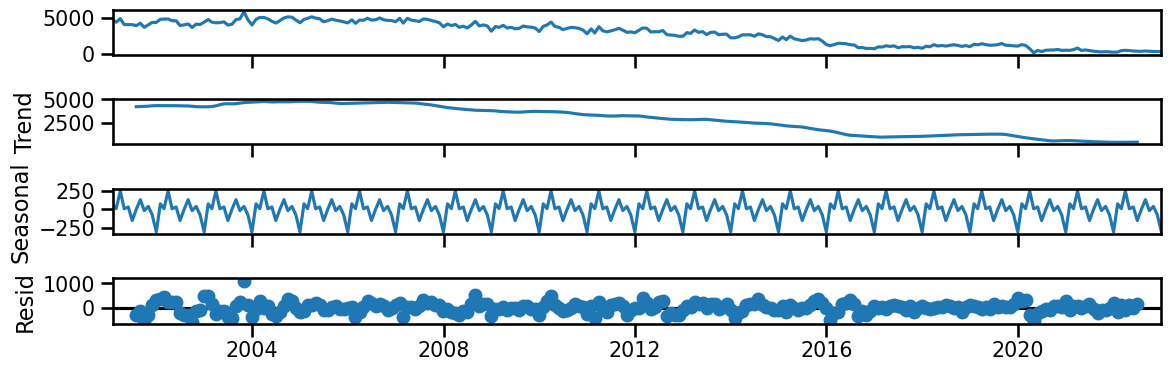

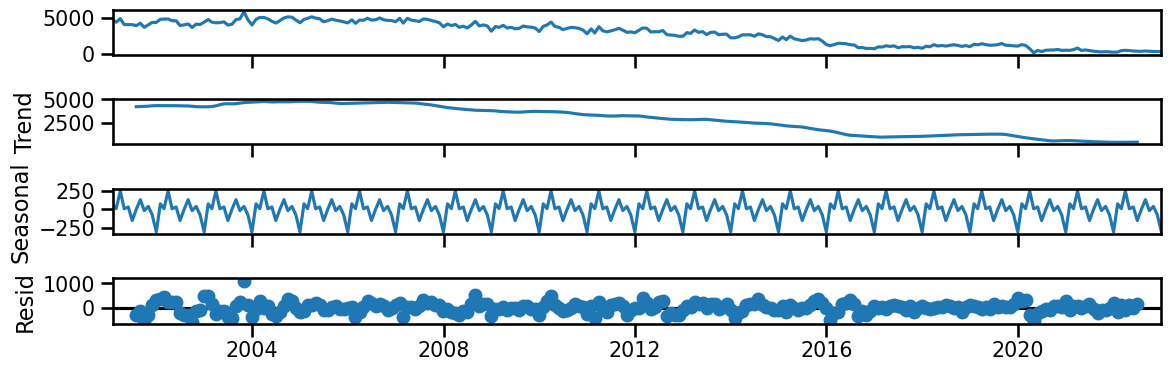

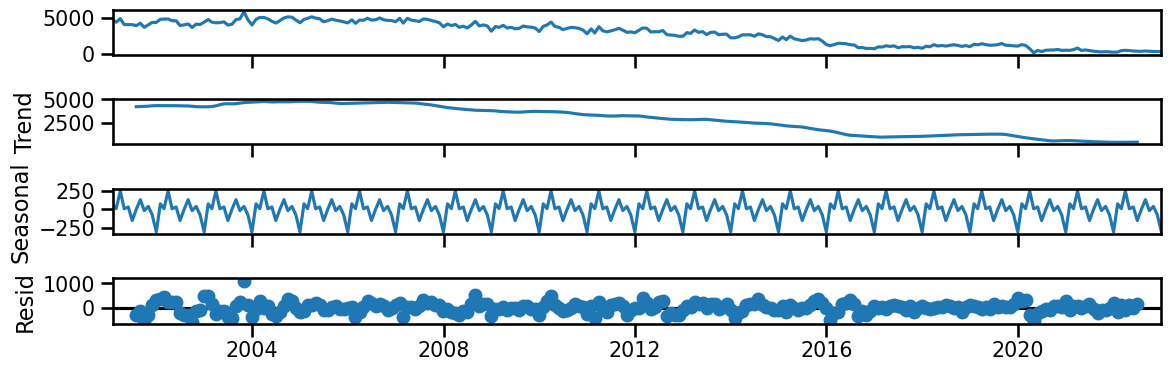

In [53]:
dnarcotics.plot()
dnarcotics.plot(seasonal=True)

In [54]:
dtheft.trend

Date
2001-01-31   NaN
2001-02-28   NaN
2001-03-31   NaN
2001-04-30   NaN
2001-05-31   NaN
              ..
2022-08-31   NaN
2022-09-30   NaN
2022-10-31   NaN
2022-11-30   NaN
2022-12-31   NaN
Freq: M, Name: trend, Length: 264, dtype: float64

In [55]:
dnarcotics.trend

Date
2001-01-31   NaN
2001-02-28   NaN
2001-03-31   NaN
2001-04-30   NaN
2001-05-31   NaN
              ..
2022-08-31   NaN
2022-09-30   NaN
2022-10-31   NaN
2022-11-30   NaN
2022-12-31   NaN
Freq: M, Name: trend, Length: 264, dtype: float64

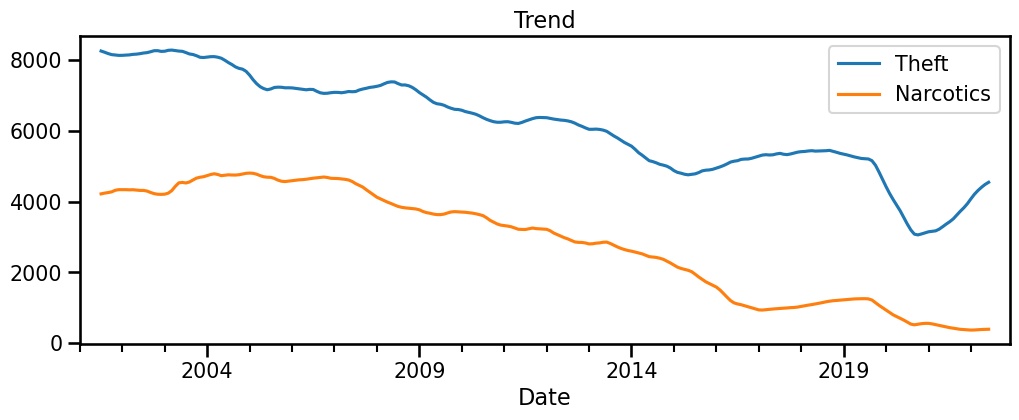

In [58]:
dtheft.trend.plot(title='Trend',label='Theft')
dnarcotics.trend.plot(label='Narcotics')
plt.legend();

In [60]:
dtheft.seasonal.head()

Date
2001-01-31    -637.881779
2001-02-28   -1446.042493
2001-03-31    -587.838128
2001-04-30    -479.173446
2001-05-31      65.395999
Freq: M, Name: seasonal, dtype: float64

In [62]:
dnarcotics.seasonal.head()

Date
2001-01-31     74.689484
2001-02-28      9.499008
2001-03-31    247.929563
2001-04-30      8.379960
2001-05-31     32.407738
Freq: M, Name: seasonal, dtype: float64

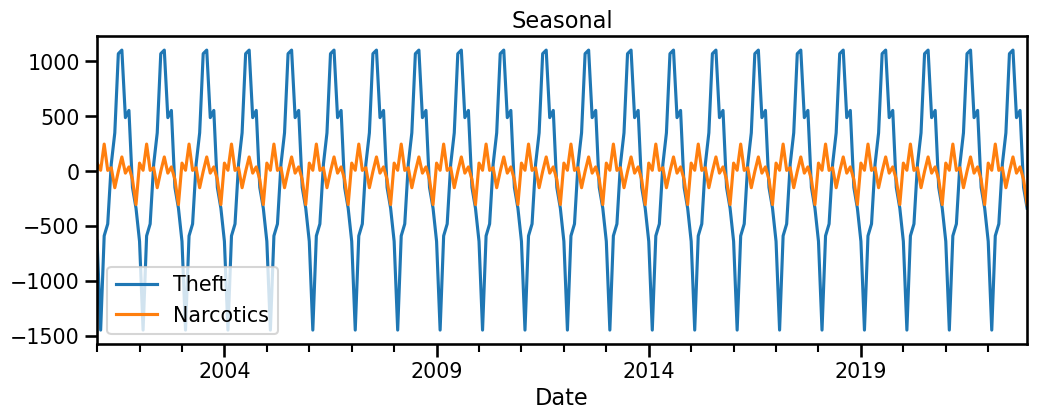

In [69]:
dtheft.seasonal.plot(title='Seasonal',label="Theft")
dnarcotics.seasonal.plot(label='Narcotics')
plt.legend();

In [70]:
dtheft.resid.head()

Date
2001-01-31   NaN
2001-02-28   NaN
2001-03-31   NaN
2001-04-30   NaN
2001-05-31   NaN
Freq: M, Name: resid, dtype: float64

In [72]:
dnarcotics.resid.head()

Date
2001-01-31   NaN
2001-02-28   NaN
2001-03-31   NaN
2001-04-30   NaN
2001-05-31   NaN
Freq: M, Name: resid, dtype: float64

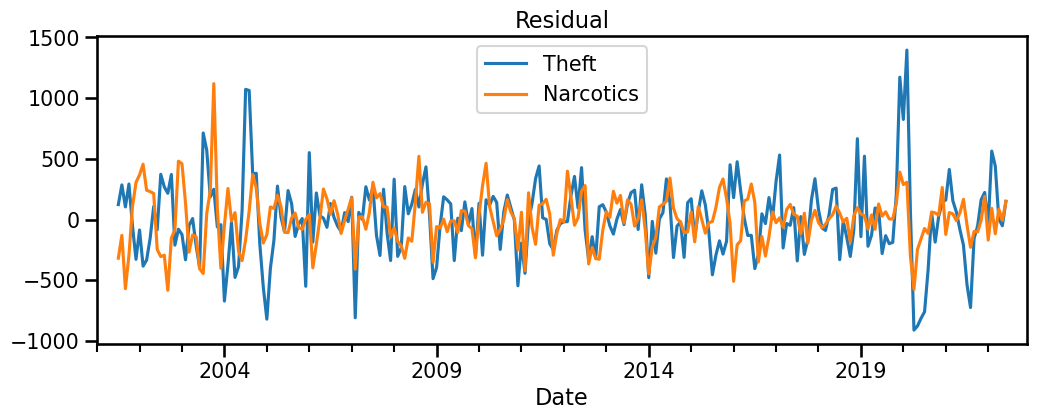

In [75]:
dtheft.resid.plot(title='Residual')
dnarcotics.resid.plot()
plt.legend(['Theft','Narcotics']);

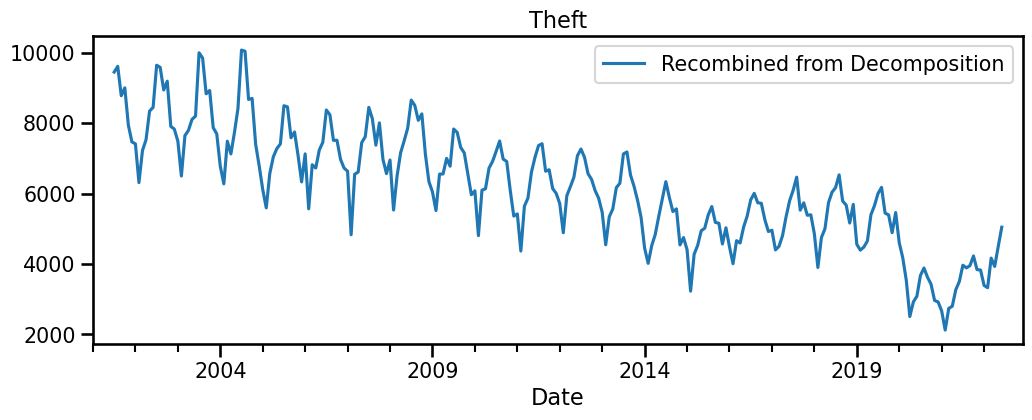

In [78]:
mtheft=dtheft.trend+dtheft.seasonal+dtheft.resid
ax=mtheft.plot(title='Theft')
ax.legend(['Recombined from Decomposition']);

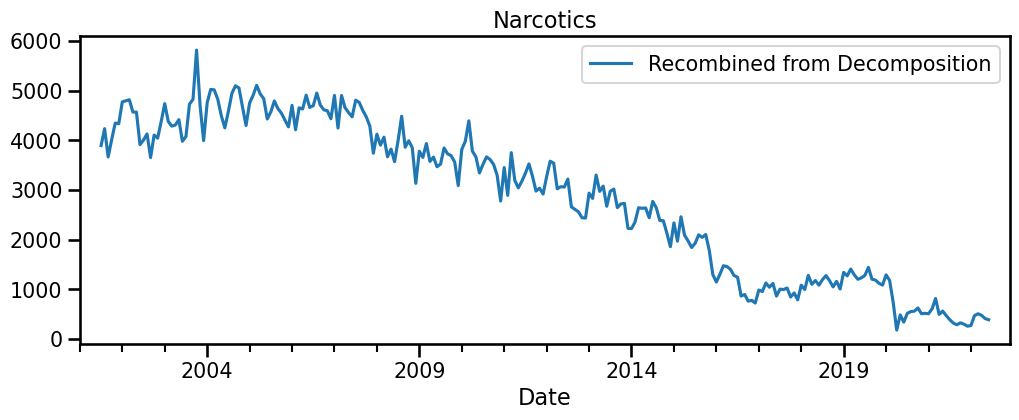

In [80]:
mnarcotics=dnarcotics.trend+dnarcotics.seasonal+dnarcotics.resid
ax=mnarcotics.plot(title='Narcotics')
ax.legend(['Recombined from Decomposition']);

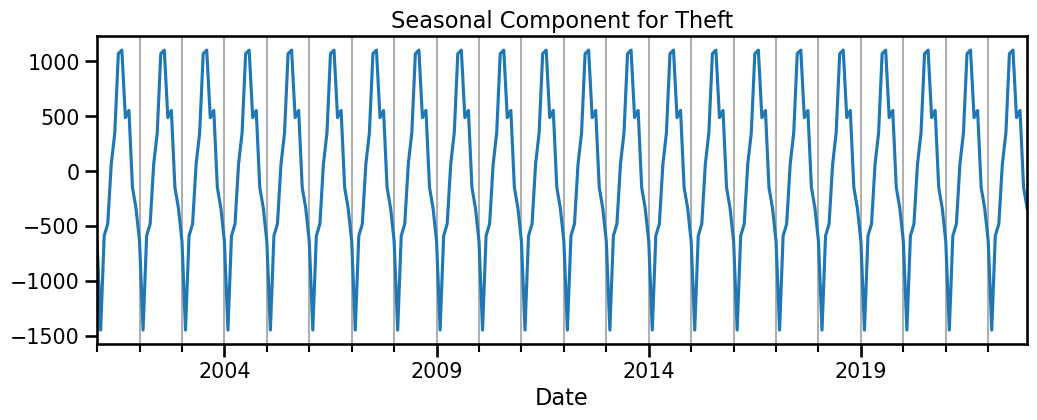

In [82]:
stheft=dtheft.seasonal
ax=stheft.plot(title=f'Seasonal Component for Theft')
ax.grid(which='both',axis='x');

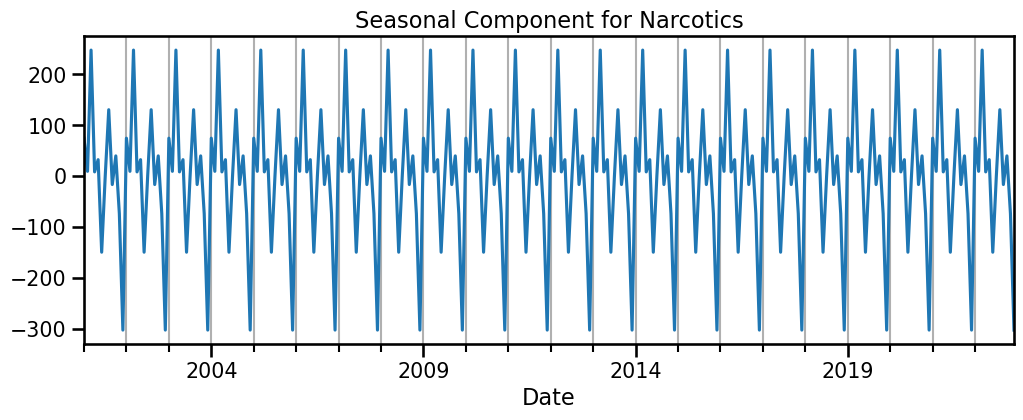

In [84]:
snarcotics=dnarcotics.seasonal
ax=snarcotics.plot(title=f'Seasonal Component for Narcotics')
ax.grid(which='both',axis='x');

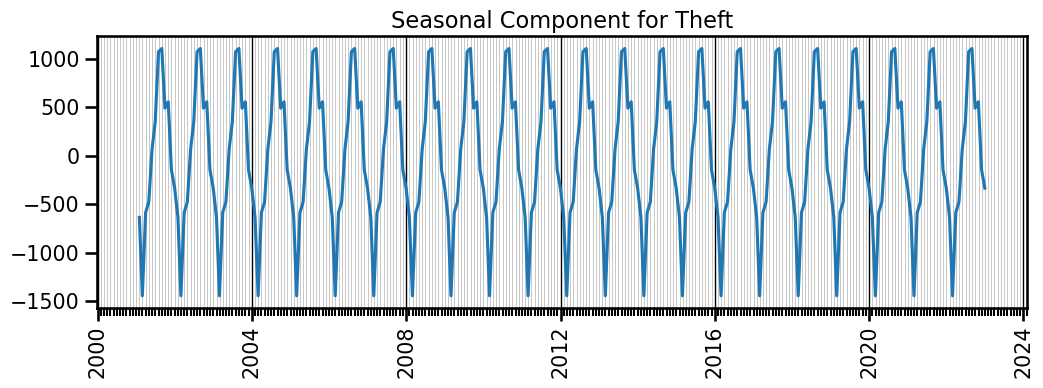

In [85]:
import matplotlib.dates as mdates
minor_loc = mdates.MonthLocator()
fig, ax = plt.subplots()
ax.plot(stheft)
ax.set(title=f'Seasonal Component for Theft');
ax.xaxis.set_minor_locator(minor_loc)
ax.grid(which='major', axis='x',lw=1, color='k')
ax.grid(which='minor',axis='x',lw=0.5)
fig.autofmt_xdate(rotation=90, ha='center')



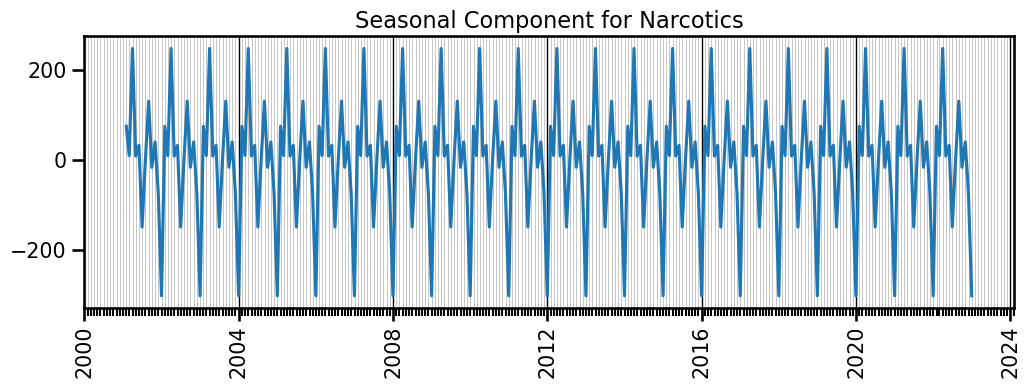

In [86]:

minor_loc = mdates.MonthLocator()
fig, ax = plt.subplots()
ax.plot(snarcotics)
ax.set(title=f'Seasonal Component for Narcotics');
ax.xaxis.set_minor_locator(minor_loc)
ax.grid(which='major', axis='x',lw=1, color='k')
ax.grid(which='minor',axis='x',lw=0.5)
fig.autofmt_xdate(rotation=90, ha='center')



In [87]:
stheft.max()

1103.945601851852

In [88]:
stheft.min()

-1446.042493386243

In [89]:
snarcotics.max()

247.92956349206358

In [90]:
snarcotics.min()

-302.7331349206349

In [91]:
mag_theft=stheft.max()-stheft.min()
mag_theft

2549.988095238095

In [92]:
mag_nar=snarcotics.max()-snarcotics.min()
mag_nar

550.6626984126984

In [108]:
stheft.idxmax()

Timestamp('2001-08-31 00:00:00', freq='M')

In [100]:
stheft.idxmin()

Timestamp('2001-02-28 00:00:00', freq='M')

In [94]:
snarcotics.idxmax()

Timestamp('2001-03-31 00:00:00', freq='M')

In [109]:
snarcotics.idxmin()

Timestamp('2001-12-31 00:00:00', freq='M')

In [97]:
import matplotlib.dates as mdates
def plot_seasonal(seasonal):
    minor_loc = mdates.MonthLocator()
    fig, ax = plt.subplots()
    ax.plot(seasonal)
    ax.set(title=f'Seasonal Component');
    ax.xaxis.set_minor_locator(minor_loc)
    ax.grid(which='major', axis='x',lw=1, color='k')
    ax.grid(which='minor',axis='x',lw=0.5)
    fig.autofmt_xdate(rotation=90, ha='center')
    
    return fig, ax



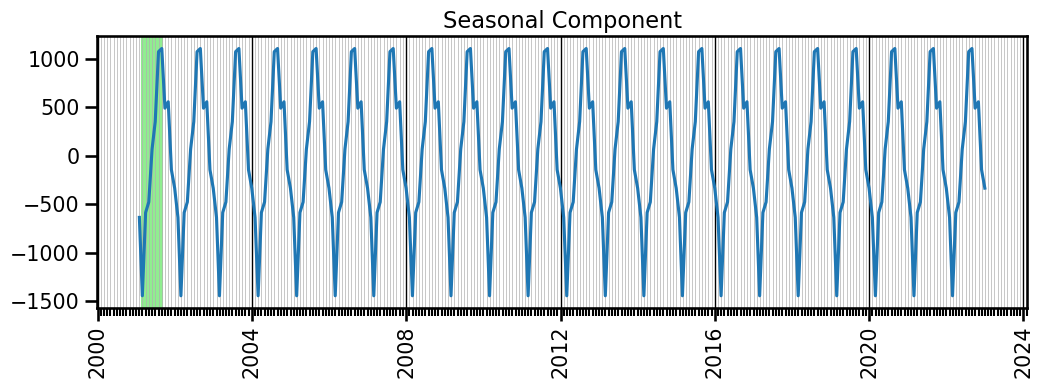

In [103]:
fig,ax=plot_seasonal(stheft)
ax.axvspan(stheft.idxmin(),stheft.idxmax(),color='lightgreen');

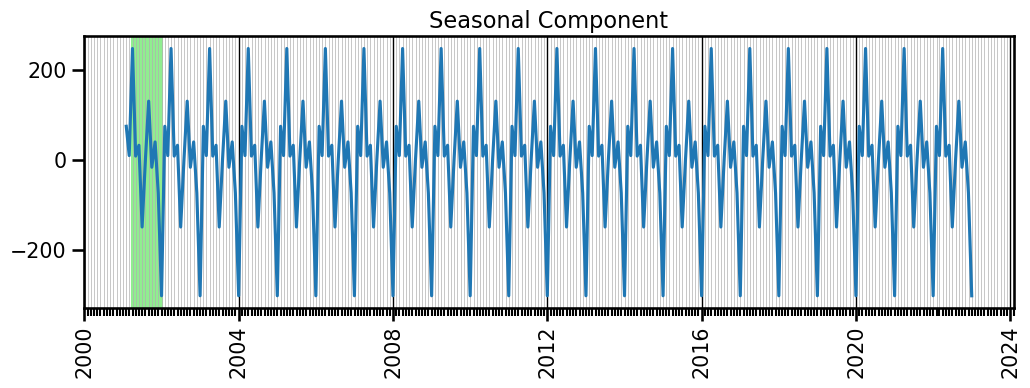

In [105]:
fig,ax=plot_seasonal(snarcotics)
ax.axvspan(snarcotics.idxmin(),snarcotics.idxmax(),color='lightgreen');

In [106]:
det_theft=stheft.idxmax()-stheft.idxmin()
det_theft

Timedelta('184 days 00:00:00')

In [107]:
del_nar=snarcotics.idxmax()-snarcotics.idxmin()
del_nar

Timedelta('-275 days +00:00:00')

In [110]:
from scipy.signal import find_peaks
peaks, props = find_peaks(stheft, height=stheft.max())


In [111]:
peaks

array([  7,  19,  31,  43,  55,  67,  79,  91, 103, 115, 127, 139, 151,
       163, 175, 187, 199, 211, 223, 235, 247, 259])

In [112]:
props

{'peak_heights': array([1103.94560185, 1103.94560185, 1103.94560185, 1103.94560185,
        1103.94560185, 1103.94560185, 1103.94560185, 1103.94560185,
        1103.94560185, 1103.94560185, 1103.94560185, 1103.94560185,
        1103.94560185, 1103.94560185, 1103.94560185, 1103.94560185,
        1103.94560185, 1103.94560185, 1103.94560185, 1103.94560185,
        1103.94560185, 1103.94560185])}

In [113]:
npeaks,nprops=find_peaks(snarcotics,height=snarcotics.max())

In [114]:
npeaks

array([  2,  14,  26,  38,  50,  62,  74,  86,  98, 110, 122, 134, 146,
       158, 170, 182, 194, 206, 218, 230, 242, 254])

In [115]:
nprops

{'peak_heights': array([247.92956349, 247.92956349, 247.92956349, 247.92956349,
        247.92956349, 247.92956349, 247.92956349, 247.92956349,
        247.92956349, 247.92956349, 247.92956349, 247.92956349,
        247.92956349, 247.92956349, 247.92956349, 247.92956349,
        247.92956349, 247.92956349, 247.92956349, 247.92956349,
        247.92956349, 247.92956349])}

In [116]:
p_dates=stheft.index[peaks]
p_dates

DatetimeIndex(['2001-08-31', '2002-08-31', '2003-08-31', '2004-08-31',
               '2005-08-31', '2006-08-31', '2007-08-31', '2008-08-31',
               '2009-08-31', '2010-08-31', '2011-08-31', '2012-08-31',
               '2013-08-31', '2014-08-31', '2015-08-31', '2016-08-31',
               '2017-08-31', '2018-08-31', '2019-08-31', '2020-08-31',
               '2021-08-31', '2022-08-31'],
              dtype='datetime64[ns]', name='Date', freq=None)

In [120]:
peak_dates=snarcotics.index[npeaks]
peak_dates

DatetimeIndex(['2001-03-31', '2002-03-31', '2003-03-31', '2004-03-31',
               '2005-03-31', '2006-03-31', '2007-03-31', '2008-03-31',
               '2009-03-31', '2010-03-31', '2011-03-31', '2012-03-31',
               '2013-03-31', '2014-03-31', '2015-03-31', '2016-03-31',
               '2017-03-31', '2018-03-31', '2019-03-31', '2020-03-31',
               '2021-03-31', '2022-03-31'],
              dtype='datetime64[ns]', name='Date', freq=None)

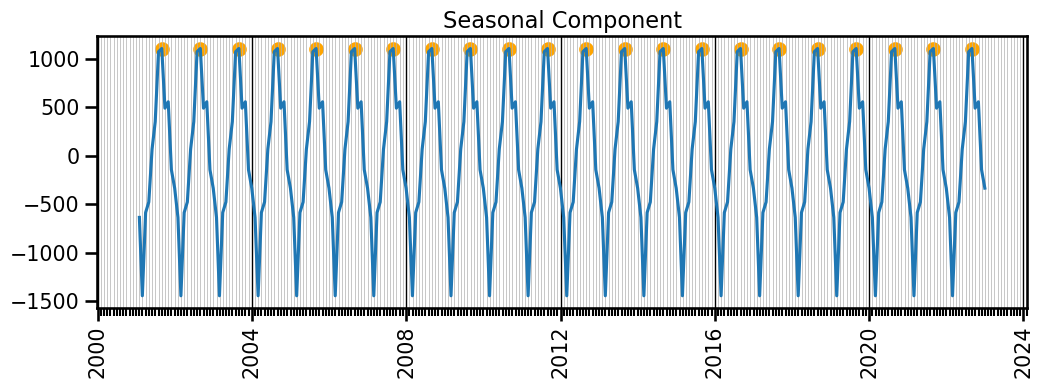

In [118]:
fig,ax=plot_seasonal(stheft)
ax.scatter(p_dates,props['peak_heights'], color='orange')

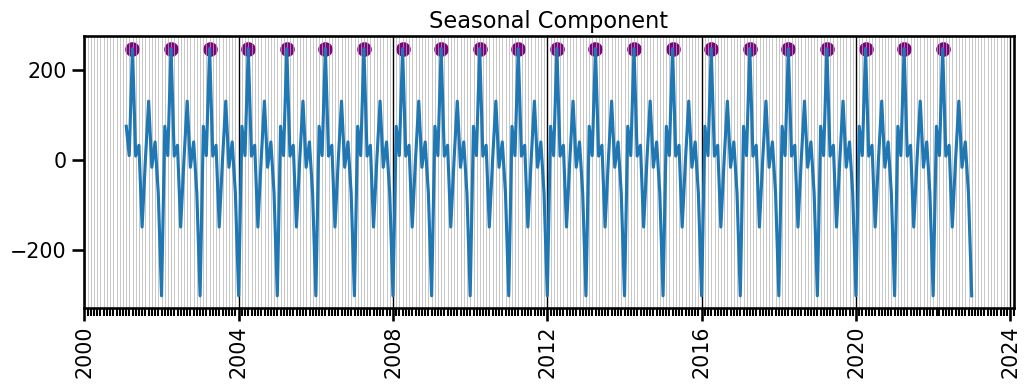

In [121]:
fig,ax=plot_seasonal(snarcotics)
ax.scatter(peak_dates,nprops["peak_heights"],color='purple');

In [122]:
tperiod=p_dates[1]-p_dates[0]
tperiod

Timedelta('365 days 00:00:00')

In [123]:
nperiod=peak_dates[1]-peak_dates[0]
nperiod

Timedelta('365 days 00:00:00')

In [125]:
tperiods = []
for i in range(len(p_dates)-1):
    delta = p_dates[i+1] - p_dates[i]
    tperiods.append(delta)
tperiods



[Timedelta('365 days 00:00:00'),
 Timedelta('365 days 00:00:00'),
 Timedelta('366 days 00:00:00'),
 Timedelta('365 days 00:00:00'),
 Timedelta('365 days 00:00:00'),
 Timedelta('365 days 00:00:00'),
 Timedelta('366 days 00:00:00'),
 Timedelta('365 days 00:00:00'),
 Timedelta('365 days 00:00:00'),
 Timedelta('365 days 00:00:00'),
 Timedelta('366 days 00:00:00'),
 Timedelta('365 days 00:00:00'),
 Timedelta('365 days 00:00:00'),
 Timedelta('365 days 00:00:00'),
 Timedelta('366 days 00:00:00'),
 Timedelta('365 days 00:00:00'),
 Timedelta('365 days 00:00:00'),
 Timedelta('365 days 00:00:00'),
 Timedelta('366 days 00:00:00'),
 Timedelta('365 days 00:00:00'),
 Timedelta('365 days 00:00:00')]

In [126]:
nperiods = []
for i in range(len(peak_dates)-1):
    delta = peak_dates[i+1] - peak_dates[i]
    nperiods.append(delta)
nperiods



[Timedelta('365 days 00:00:00'),
 Timedelta('365 days 00:00:00'),
 Timedelta('366 days 00:00:00'),
 Timedelta('365 days 00:00:00'),
 Timedelta('365 days 00:00:00'),
 Timedelta('365 days 00:00:00'),
 Timedelta('366 days 00:00:00'),
 Timedelta('365 days 00:00:00'),
 Timedelta('365 days 00:00:00'),
 Timedelta('365 days 00:00:00'),
 Timedelta('366 days 00:00:00'),
 Timedelta('365 days 00:00:00'),
 Timedelta('365 days 00:00:00'),
 Timedelta('365 days 00:00:00'),
 Timedelta('366 days 00:00:00'),
 Timedelta('365 days 00:00:00'),
 Timedelta('365 days 00:00:00'),
 Timedelta('365 days 00:00:00'),
 Timedelta('366 days 00:00:00'),
 Timedelta('365 days 00:00:00'),
 Timedelta('365 days 00:00:00')]

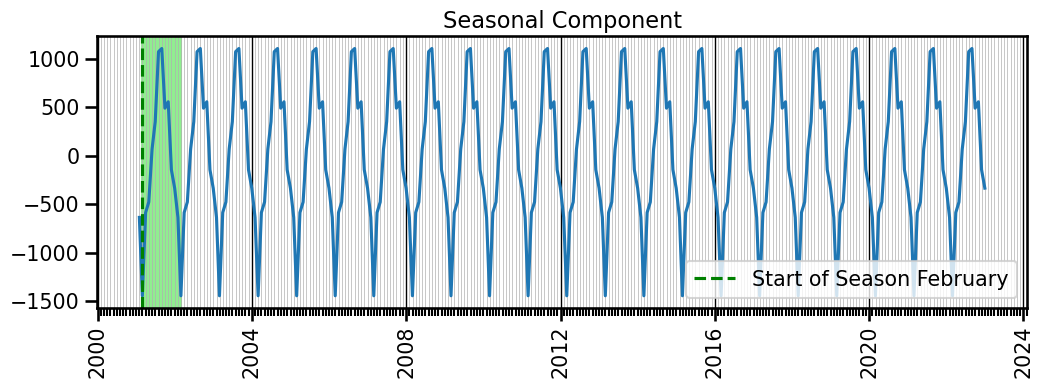

In [128]:
fig, ax = plot_seasonal(stheft)
season_start = stheft.idxmin()
ax.axvspan( season_start, season_start +tperiod, color='lightgreen')
ax.axvline(season_start, color='green', ls='--',
           label=f"Start of Season {season_start.strftime('%B')}")
ax.legend();


In [130]:
stheft.max()-stheft.min()

2549.988095238095

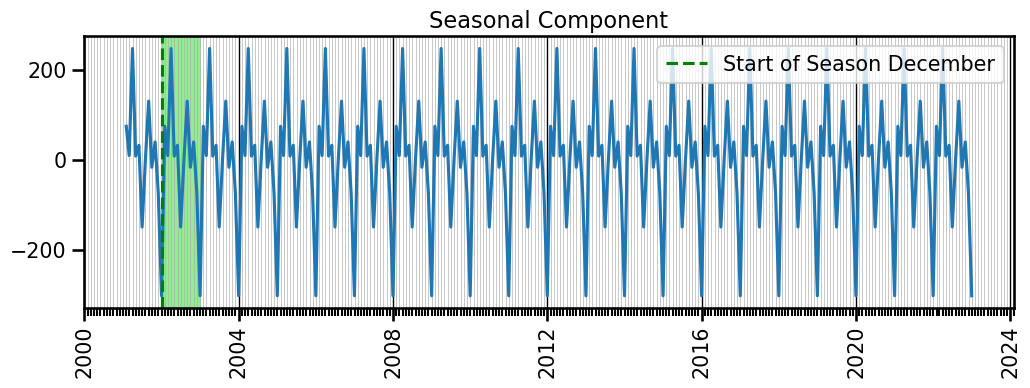

In [129]:
fig, ax = plot_seasonal(snarcotics)
season_start = snarcotics.idxmin()
ax.axvspan( season_start, season_start +nperiod, color='lightgreen')
ax.axvline(season_start, color='green', ls='--',
           label=f"Start of Season {season_start.strftime('%B')}")
ax.legend();


In [131]:
snarcotics.max()-snarcotics.min()

550.6626984126984